In [17]:
import os
import re
import pandas as pd
%matplotlib nbagg
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
data = pd.DataFrame.from_csv(r'.\reads_stat-BRAC160408.csv', header=0)
data

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,53,198,260,491,600,596,909,693,988,944,...,1792,2246,1417,825,2334,241,607,62,24,910
chr13-B150B01-32893117,648,2728,2545,2874,1586,1527,1856,2857,2703,2660,...,1122,1099,1172,268,1539,182,469,36,28,513
chr13-B150A02-32893303,31,117,120,374,376,334,583,508,627,609,...,1201,1084,801,100,1168,96,312,35,22,251
chr13-B150B02-32899030,710,2839,2648,2741,1711,1373,2077,3202,2711,3228,...,1387,1148,1447,311,1503,222,508,46,27,593
chr13-B150A03-32899219,39,270,316,640,781,805,1223,1082,1285,1391,...,2517,2366,1744,1096,2791,256,718,76,47,1582
chr13-B150B03-32900034,1407,5507,5221,5756,3315,2796,3710,5345,4843,4643,...,2148,2114,2227,1122,2588,430,858,32,45,1489
chr13-B150A04-32900244,26,123,164,288,377,366,683,502,650,657,...,1230,1287,801,101,1237,146,331,28,26,230
chr13-B150B04-32900558,755,3292,3457,3400,2257,1619,2272,3704,2971,3414,...,1719,1252,1537,339,1486,303,545,33,54,746
chr13-B150A05-32903518,29,217,246,420,463,493,771,654,833,801,...,1482,1664,1062,330,1897,174,440,48,27,382
chr13-B150B05-32904954,1072,4593,4316,4520,2753,2206,3089,4343,3865,4243,...,1879,1635,1935,954,2154,320,735,62,42,1435


In [7]:
p_data = [
    go.Surface(
        z=data.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=p_data, layout=layout)
py.iplot(fig, filename='BRCA')

In [8]:
data_norm_by_sample = (data - data.min()) / (data.max() - data.min())
data_norm_by_sample

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.005074,0.004924,0.006456,0.013306,0.039899,0.037208,0.036462,0.020408,0.035393,0.033951,...,0.100680,0.057503,0.076405,0.010305,0.065930,0.115201,0.065515,0.057038,0.048682,0.029614
chr13-B150B01-32893117,0.062039,0.067840,0.063195,0.077882,0.105466,0.095330,0.074448,0.084136,0.096830,0.095666,...,0.063037,0.028137,0.063194,0.003348,0.043473,0.086998,0.050621,0.033119,0.056795,0.016694
chr13-B150A02-32893303,0.002968,0.002910,0.002980,0.010135,0.025003,0.020852,0.023385,0.014960,0.022461,0.021903,...,0.067476,0.027753,0.043190,0.001249,0.032993,0.045889,0.033675,0.032199,0.044625,0.008168
chr13-B150B02-32899030,0.067975,0.070601,0.065753,0.074278,0.113778,0.085716,0.083313,0.094296,0.097116,0.116094,...,0.077926,0.029391,0.078022,0.003885,0.042456,0.106119,0.054830,0.042318,0.054767,0.019298
chr13-B150A03-32899219,0.003734,0.006714,0.007847,0.017343,0.051935,0.050256,0.049057,0.031864,0.046033,0.050027,...,0.141412,0.060575,0.094036,0.013691,0.078840,0.122371,0.077496,0.069917,0.095335,0.051482
chr13-B150B03-32900034,0.134706,0.136949,0.129643,0.155981,0.220442,0.174554,0.148817,0.157405,0.173491,0.166984,...,0.120681,0.054123,0.120080,0.014015,0.073105,0.205545,0.092607,0.029439,0.091278,0.048456
chr13-B150A04-32900244,0.002489,0.003059,0.004072,0.007804,0.025070,0.022849,0.027397,0.014783,0.023285,0.023629,...,0.069105,0.032950,0.043190,0.001262,0.034943,0.069790,0.035726,0.025759,0.052738,0.007485
chr13-B150B04-32900558,0.072283,0.081866,0.085841,0.092136,0.150086,0.101074,0.091135,0.109079,0.106430,0.122784,...,0.096578,0.032054,0.082875,0.004235,0.041976,0.144837,0.058824,0.030359,0.109533,0.024277
chr13-B150A05-32903518,0.002776,0.005396,0.006108,0.011381,0.030789,0.030778,0.030927,0.019260,0.029841,0.028808,...,0.083263,0.042602,0.057263,0.004122,0.053586,0.083174,0.047491,0.044158,0.054767,0.012431
chr13-B150B05-32904954,0.102633,0.114220,0.107171,0.122487,0.183070,0.137720,0.123907,0.127897,0.138456,0.152598,...,0.105568,0.041860,0.104335,0.011917,0.060846,0.152964,0.079331,0.057038,0.085193,0.046699


In [9]:
p1_data = [
    go.Surface(
        z=data_norm_by_sample.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA1',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig1 = go.Figure(data=p1_data, layout=layout)
py.iplot(fig1, filename='BRCA1')

In [51]:
data_nbs_T = data_norm_by_sample.T
data_norm_by_double = (data_nbs_T - data_nbs_T.min()) / (data_nbs_T.max() - data_nbs_T.min())
data_norm_by_double = data_norm_by_double.T
data_norm_by_double

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.001363,0.000000,0.013894,0.076005,0.317156,0.292756,0.285991,0.140413,0.276298,0.263218,...,0.868323,0.476789,0.648193,0.048800,0.553212,1.000000,0.549449,0.472573,0.396798,0.223889
chr13-B150B01-32893117,0.556083,0.611047,0.567036,0.706187,0.967539,0.871504,0.673656,0.765441,0.885711,0.874688,...,0.565539,0.234870,0.567026,0.000000,0.380177,0.792560,0.447895,0.282070,0.506397,0.126455
chr13-B150A02-32893303,0.025953,0.025072,0.026131,0.134173,0.358681,0.295990,0.334252,0.207031,0.320293,0.311860,...,1.000000,0.400198,0.633292,0.000000,0.479328,0.674049,0.489622,0.467329,0.654958,0.104475
chr13-B150B02-32899030,0.571167,0.594567,0.551362,0.627336,0.979362,0.729273,0.707859,0.805734,0.830870,1.000000,...,0.659846,0.227313,0.660706,0.000000,0.343747,0.911098,0.454019,0.342516,0.453455,0.137358
chr13-B150A03-32899219,0.000000,0.021649,0.029872,0.098849,0.350100,0.337904,0.329198,0.204316,0.307228,0.336241,...,1.000000,0.412854,0.655894,0.072319,0.545515,0.861696,0.535756,0.480709,0.665324,0.346811
chr13-B150B03-32900034,0.551929,0.562189,0.528779,0.649222,0.944009,0.734158,0.616461,0.655736,0.729299,0.699543,...,0.487793,0.183418,0.485044,0.000000,0.270224,0.875885,0.359406,0.070533,0.353330,0.157500
chr13-B150A04-32900244,0.017914,0.026225,0.041015,0.095477,0.347423,0.315019,0.381378,0.197317,0.321377,0.326395,...,0.990009,0.462417,0.611841,0.000000,0.491491,1.000000,0.502921,0.357479,0.751177,0.090812
chr13-B150B04-32900558,0.466561,0.532263,0.559518,0.602675,1.000000,0.663956,0.595814,0.718843,0.700681,0.812805,...,0.633135,0.190738,0.539180,0.000000,0.258767,0.964012,0.374277,0.179115,0.721958,0.137414
chr13-B150A05-32903518,0.000000,0.032551,0.041398,0.106913,0.348036,0.347901,0.349749,0.204794,0.336256,0.323424,...,1.000000,0.494812,0.676964,0.016720,0.631280,0.998893,0.555547,0.514145,0.645949,0.119955
chr13-B150B05-32904954,0.530030,0.597728,0.556546,0.646030,1.000000,0.735035,0.654329,0.677642,0.739335,0.821965,...,0.547177,0.174949,0.539976,0.000000,0.285879,0.824099,0.393882,0.263629,0.428132,0.203221


In [58]:
p2_data = [
    go.Surface(
        z=data_norm_by_double.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA2',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig2 = go.Figure(data=p2_data, layout=layout)
py.iplot(fig2, filename='BRCA2')

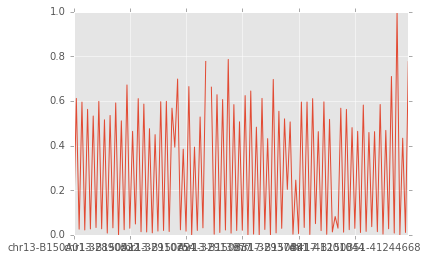

In [55]:
data_norm_by_double['008-E10_S2'].plot()

In [10]:
data_nbs_T = data.T
data_norm_by_amplicon = (data_nbs_T - data_nbs_T.min()) / (data_nbs_T.max() - data_nbs_T.min())
data_norm_by_amplicon = data_norm_by_amplicon.T
data_norm_by_amplicon

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.012554,0.075325,0.102165,0.202165,0.249351,0.247619,0.383117,0.289610,0.417316,0.398268,...,0.765368,0.961905,0.603030,0.346753,1.000000,0.093939,0.252381,0.016450,0.000000,0.383550
chr13-B150B01-32893117,0.217850,0.948700,0.884399,1.000000,0.547435,0.526704,0.642305,0.994027,0.939916,0.924807,...,0.384399,0.376318,0.401968,0.084329,0.530921,0.054111,0.154954,0.002811,0.000000,0.170415
chr13-B150A02-32893303,0.007634,0.080577,0.083121,0.298558,0.300254,0.264631,0.475827,0.412214,0.513147,0.497880,...,1.000000,0.900763,0.660729,0.066158,0.972010,0.062765,0.245971,0.011026,0.000000,0.194232
chr13-B150B02-32899030,0.213371,0.878475,0.818807,0.847860,0.526086,0.420494,0.640425,0.991878,0.838488,1.000000,...,0.424867,0.350203,0.443611,0.088722,0.461106,0.060918,0.150266,0.005936,0.000000,0.176820
chr13-B150A03-32899219,0.000000,0.083939,0.100654,0.218387,0.269622,0.278343,0.430233,0.378997,0.452762,0.491279,...,0.900436,0.845567,0.619549,0.384084,1.000000,0.078852,0.246730,0.013445,0.002907,0.560683
chr13-B150B03-32900034,0.240217,0.956499,0.906534,1.000000,0.573550,0.482879,0.642558,0.928197,0.840496,0.805556,...,0.369672,0.363732,0.383473,0.190426,0.446541,0.069532,0.144305,0.000000,0.002271,0.254542
chr13-B150A04-32900244,0.000000,0.076923,0.109437,0.207772,0.278351,0.269627,0.521015,0.377478,0.494845,0.500397,...,0.954798,1.000000,0.614592,0.059477,0.960349,0.095163,0.241872,0.001586,0.000000,0.161776
chr13-B150B04-32900558,0.196677,0.887769,0.932716,0.917189,0.605829,0.432035,0.609916,1.000000,0.800327,0.921002,...,0.459275,0.332062,0.409698,0.083356,0.395805,0.073549,0.139472,0.000000,0.005721,0.194225
chr13-B150A05-32903518,0.001070,0.101604,0.117112,0.210160,0.233155,0.249198,0.397861,0.335294,0.431016,0.413904,...,0.778075,0.875401,0.553476,0.162032,1.000000,0.078610,0.220856,0.011230,0.000000,0.189840
chr13-B150B05-32904954,0.226324,1.000000,0.939134,0.983960,0.595693,0.475500,0.669523,0.945067,0.840035,0.923094,...,0.403648,0.350033,0.415953,0.200396,0.464074,0.061085,0.152274,0.004395,0.000000,0.306087


In [11]:
p3_data = [
    go.Surface(
        z=data_norm_by_amplicon.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA3',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig3 = go.Figure(data=p3_data, layout=layout)
py.iplot(fig3, filename='BRCA3')

In [12]:
data_norm_by_double = (data_norm_by_amplicon - data_norm_by_amplicon.min()) / (data_norm_by_amplicon.max() - data_norm_by_amplicon.min())
data_norm_by_double

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.049159,0.069315,0.089279,0.178787,0.328417,0.446323,0.484573,0.255979,0.383031,0.362739,...,0.732721,0.954758,0.786649,0.344587,1.000000,0.639305,0.889947,0.536707,0.000000,0.591880
chr13-B150B01-32893117,0.853051,0.948367,0.882740,1.000000,0.759300,1.000000,0.857960,0.993744,0.936380,0.920367,...,0.298743,0.259319,0.446129,0.081292,0.394676,0.340647,0.439050,0.091711,0.000000,0.247379
chr13-B150A02-32893303,0.029891,0.074601,0.069963,0.278005,0.401999,0.480073,0.618131,0.384387,0.484500,0.468232,...,1.000000,0.882147,0.884368,0.063060,0.963881,0.405541,0.860282,0.359745,0.000000,0.285877
chr13-B150B02-32899030,0.835513,0.877686,0.816206,0.843402,0.728439,0.789289,0.855251,0.991493,0.828985,1.000000,...,0.344842,0.228305,0.516657,0.085700,0.304584,0.391694,0.417350,0.193657,0.000000,0.257732
chr13-B150A03-32899219,0.000000,0.077985,0.087747,0.195484,0.357720,0.507276,0.552448,0.349597,0.420562,0.461242,...,0.886583,0.816596,0.814626,0.382041,1.000000,0.526169,0.863792,0.438650,0.176665,0.878188
chr13-B150B03-32900034,0.940636,0.956216,0.905193,1.000000,0.797049,0.913055,0.858324,0.924798,0.831111,0.794075,...,0.281966,0.244371,0.414807,0.187741,0.285789,0.456282,0.389763,0.000000,0.138023,0.383359
chr13-B150A04-32900244,0.000000,0.070924,0.096656,0.184558,0.370337,0.489985,0.683229,0.348007,0.465122,0.470898,...,0.948508,1.000000,0.806229,0.056357,0.948832,0.648478,0.841309,0.051746,0.000000,0.233417
chr13-B150B04-32900558,0.770143,0.887040,0.931750,0.914762,0.843709,0.812186,0.811299,1.000000,0.788578,0.916338,...,0.384038,0.206761,0.459221,0.080316,0.220316,0.486409,0.367395,0.000000,0.347651,0.285865
chr13-B150A05-32903518,0.004188,0.095765,0.104442,0.187017,0.305007,0.449455,0.505813,0.303825,0.397537,0.379298,...,0.747196,0.852027,0.702724,0.159253,1.000000,0.524353,0.744046,0.366390,0.000000,0.278777
chr13-B150B05-32904954,0.886235,1.000000,0.938261,0.983490,0.829057,0.898416,0.897170,0.942466,0.830623,0.918553,...,0.320670,0.228103,0.469814,0.197743,0.308414,0.392946,0.426647,0.143380,0.000000,0.466672


In [13]:
p4_data = [
    go.Surface(
        z=data_norm_by_double.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA4',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig4 = go.Figure(data=p4_data, layout=layout)
py.iplot(fig4, filename='BRCA4')

<IPython.core.display.Javascript object>


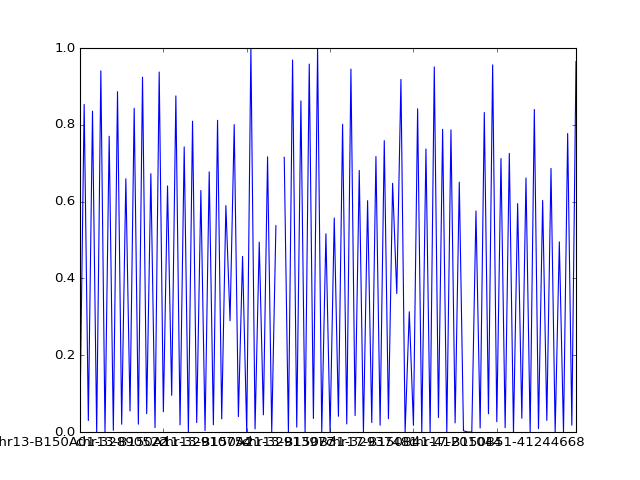

In [18]:
data_norm_by_double['008-E08_S1'].plot()

In [19]:
data[::2]

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,53,198,260,491,600,596,909,693,988,944,...,1792,2246,1417,825,2334,241,607,62,24,910
chr13-B150A02-32893303,31,117,120,374,376,334,583,508,627,609,...,1201,1084,801,100,1168,96,312,35,22,251
chr13-B150A03-32899219,39,270,316,640,781,805,1223,1082,1285,1391,...,2517,2366,1744,1096,2791,256,718,76,47,1582
chr13-B150A04-32900244,26,123,164,288,377,366,683,502,650,657,...,1230,1287,801,101,1237,146,331,28,26,230
chr13-B150A05-32903518,29,217,246,420,463,493,771,654,833,801,...,1482,1664,1062,330,1897,174,440,48,27,382
chr13-B150A06-32906231,51,278,259,593,715,663,1164,1033,1158,1082,...,2339,2124,1493,280,2354,239,617,47,39,630
chr13-B150A07-32906656,49,223,240,387,578,602,988,844,1047,1065,...,2100,1679,1319,375,2024,207,564,49,20,857
chr13-B150A08-32907025,47,214,236,533,549,581,914,719,859,866,...,1852,1743,1350,172,1955,197,465,46,37,485
chr13-B150A09-32907454,129,461,694,1226,1178,1516,2534,1974,2268,2295,...,4028,4555,3477,3554,5379,445,1405,139,64,3282
chr13-B150A10-32910431,6,58,63,176,171,208,342,251,338,307,...,687,589,427,65,642,77,179,16,4,146


In [21]:
data_a = (data[::2].T - data[::2].T.min()) / (data[::2].T.max() - data[::2].T.min())
data_a = data_a.T
data_a

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.012554,0.075325,0.102165,0.202165,0.249351,0.247619,0.383117,0.289610,0.417316,0.398268,...,0.765368,0.961905,0.603030,0.346753,1.000000,0.093939,0.252381,0.016450,0.000000,0.383550
chr13-B150A02-32893303,0.007634,0.080577,0.083121,0.298558,0.300254,0.264631,0.475827,0.412214,0.513147,0.497880,...,1.000000,0.900763,0.660729,0.066158,0.972010,0.062765,0.245971,0.011026,0.000000,0.194232
chr13-B150A03-32899219,0.000000,0.083939,0.100654,0.218387,0.269622,0.278343,0.430233,0.378997,0.452762,0.491279,...,0.900436,0.845567,0.619549,0.384084,1.000000,0.078852,0.246730,0.013445,0.002907,0.560683
chr13-B150A04-32900244,0.000000,0.076923,0.109437,0.207772,0.278351,0.269627,0.521015,0.377478,0.494845,0.500397,...,0.954798,1.000000,0.614592,0.059477,0.960349,0.095163,0.241872,0.001586,0.000000,0.161776
chr13-B150A05-32903518,0.001070,0.101604,0.117112,0.210160,0.233155,0.249198,0.397861,0.335294,0.431016,0.413904,...,0.778075,0.875401,0.553476,0.162032,1.000000,0.078610,0.220856,0.011230,0.000000,0.189840
chr13-B150A06-32906231,0.005184,0.103240,0.095032,0.239309,0.292009,0.269546,0.485961,0.429374,0.483369,0.450540,...,0.993521,0.900648,0.628078,0.104104,1.000000,0.086393,0.249676,0.003456,0.000000,0.255292
chr13-B150A07-32906656,0.013942,0.097596,0.105769,0.176442,0.268269,0.279808,0.465385,0.396154,0.493750,0.502404,...,1.000000,0.797596,0.624519,0.170673,0.963462,0.089904,0.261538,0.013942,0.000000,0.402404
chr13-B150A08-32907025,0.005214,0.092284,0.103754,0.258603,0.266945,0.283629,0.457247,0.355579,0.428571,0.432221,...,0.946298,0.889468,0.684567,0.070386,1.000000,0.083420,0.223149,0.004692,0.000000,0.233577
chr13-B150A09-32907454,0.012230,0.074694,0.118532,0.218627,0.209595,0.273189,0.464722,0.359360,0.414675,0.419755,...,0.745814,0.844967,0.642145,0.656632,1.000000,0.071684,0.252305,0.014111,0.000000,0.605456
chr13-B150A10-32910431,0.002928,0.079063,0.086384,0.251830,0.244510,0.298682,0.494876,0.361640,0.489019,0.443631,...,1.000000,0.856515,0.619327,0.089312,0.934114,0.106881,0.256223,0.017570,0.000000,0.207906


In [30]:
p5_data = [
    go.Surface(
        z=data_a.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA5',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig6 = go.Figure(data=p5_data, layout=layout)
py.iplot(fig6, filename='BRCA6')

In [31]:
data_b = (data_a - data_a.min()) / (data_a.max() - data_a.min())
data_b

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.136309,0.139373,0.089279,0.276339,0.476423,0.562847,0.584768,0.353002,0.461112,0.453409,...,0.732721,0.881337,0.523107,0.510775,1.000000,0.632659,0.738711,0.536707,0.000000,0.578107
chr13-B150A02-32893303,0.082884,0.150002,0.069963,0.429694,0.583165,0.605409,0.745942,0.530080,0.583266,0.585271,...,1.000000,0.690888,0.741535,0.067782,0.899178,0.394587,0.668280,0.359745,0.000000,0.261778
chr13-B150A03-32899219,0.000000,0.156807,0.087747,0.302147,0.518931,0.639714,0.666677,0.482105,0.506294,0.576533,...,0.886583,0.518957,0.585643,0.569712,1.000000,0.517438,0.676614,0.438650,0.176665,0.874078
chr13-B150A04-32900244,0.000000,0.142608,0.096656,0.285259,0.537234,0.617909,0.824501,0.479911,0.559938,0.588603,...,0.948508,1.000000,0.566874,0.057234,0.857173,0.642000,0.623233,0.051746,0.000000,0.207548
chr13-B150A05-32903518,0.011613,0.192558,0.104442,0.289060,0.442462,0.566797,0.610400,0.418984,0.478575,0.474107,...,0.747196,0.611888,0.335513,0.219145,1.000000,0.515589,0.392310,0.366390,0.000000,0.254438
chr13-B150A06-32906231,0.056282,0.195868,0.082045,0.335433,0.565874,0.617707,0.763560,0.554864,0.545309,0.522605,...,0.992619,0.690529,0.617928,0.127690,1.000000,0.575029,0.708989,0.112747,0.000000,0.363802
chr13-B150A07-32906656,0.151382,0.184446,0.092936,0.235417,0.516094,0.643379,0.727788,0.506884,0.558541,0.591260,...,1.000000,0.369534,0.604456,0.232787,0.868385,0.601840,0.839333,0.454883,0.000000,0.609610
chr13-B150A08-32907025,0.056610,0.173695,0.090892,0.366128,0.513317,0.652938,0.713642,0.448281,0.475459,0.498355,...,0.938826,0.655705,0.831776,0.074457,1.000000,0.552326,0.417511,0.153094,0.000000,0.327518
chr13-B150A09-32907454,0.132785,0.138097,0.105882,0.302529,0.393059,0.626820,0.726637,0.453743,0.457746,0.481853,...,0.710446,0.517089,0.671180,1.000000,1.000000,0.462698,0.737874,0.460387,0.000000,0.948889
chr13-B150A10-32910431,0.031794,0.146939,0.073272,0.355353,0.466271,0.690600,0.779058,0.457035,0.552511,0.513459,...,1.000000,0.553061,0.584799,0.104337,0.762674,0.731495,0.780922,0.573226,0.000000,0.284626


In [32]:
p7_data = [
    go.Surface(
        z=data_b.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA7',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig7 = go.Figure(data=p7_data, layout=layout)
py.iplot(fig7, filename='BRCA7')

<IPython.core.display.Javascript object>


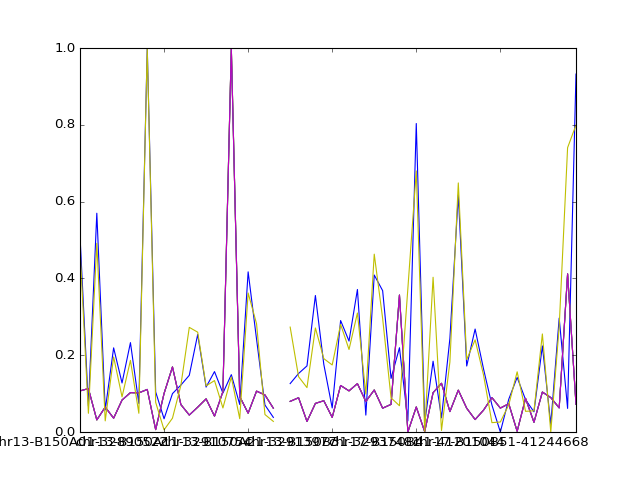

In [41]:
data_b['010-E10_S21'].plot()

In [44]:
data_a_ns = (data[::2] - data[::2].min()) / (data[::2].max() - data[::2].min())
data_a_ns

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.077485,0.050152,0.032766,0.157070,0.450450,0.337486,0.246075,0.129557,0.325643,0.290283,...,0.221071,0.057503,0.076405,0.232133,0.065930,0.187112,0.065515,0.057038,0.048682,0.277270
chr13-B150A02-32893303,0.045322,0.029635,0.015123,0.119642,0.282282,0.189128,0.157823,0.094971,0.206658,0.187269,...,0.148162,0.027753,0.043190,0.028137,0.032993,0.074534,0.033675,0.032199,0.044625,0.076478
chr13-B150A03-32899219,0.057018,0.068389,0.039824,0.204734,0.586336,0.455832,0.331077,0.202281,0.423533,0.427737,...,0.310511,0.060575,0.094036,0.308385,0.078840,0.198758,0.077496,0.069917,0.095335,0.482023
chr13-B150A04-32900244,0.038012,0.031155,0.020668,0.092131,0.283033,0.207248,0.184894,0.093849,0.214239,0.202030,...,0.151739,0.032950,0.043190,0.028419,0.034943,0.113354,0.035726,0.025759,0.052738,0.070079
chr13-B150A05-32903518,0.042398,0.054965,0.031002,0.134357,0.347598,0.279162,0.208717,0.122266,0.274555,0.246310,...,0.182828,0.042602,0.057263,0.092853,0.053586,0.135093,0.047491,0.044158,0.054767,0.116392
chr13-B150A06-32906231,0.074561,0.070415,0.032640,0.189699,0.536787,0.375425,0.315106,0.193120,0.381674,0.332718,...,0.288552,0.054379,0.080503,0.078784,0.066495,0.185559,0.066595,0.043238,0.079108,0.191956
chr13-B150A07-32906656,0.071637,0.056484,0.030246,0.123800,0.433934,0.340883,0.267461,0.157787,0.345089,0.327491,...,0.259067,0.042986,0.071120,0.105515,0.057174,0.160714,0.060874,0.045078,0.040568,0.261121
chr13-B150A08-32907025,0.068713,0.054205,0.029742,0.170505,0.412162,0.328992,0.247428,0.134418,0.283125,0.266298,...,0.228473,0.044625,0.072792,0.048396,0.055224,0.152950,0.050189,0.042318,0.075051,0.147776
chr13-B150A09-32907454,0.188596,0.116768,0.087461,0.392194,0.884384,0.858437,0.685977,0.369041,0.747528,0.705720,...,0.496916,0.116618,0.187480,1.000000,0.151945,0.345497,0.151646,0.127875,0.129817,1.000000
chr13-B150A10-32910431,0.008772,0.014691,0.007940,0.056302,0.128378,0.117780,0.092583,0.046925,0.111404,0.094403,...,0.084752,0.015080,0.023024,0.018289,0.018135,0.059783,0.019320,0.014719,0.008114,0.044485


In [45]:
p_a_ns_data = [
    go.Surface(
        z=data_a_ns.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA8',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig8 = go.Figure(data=p_a_ns_data, layout=layout)
py.iplot(fig8, filename='BRCA8')

In [47]:
data_a_nb = (data_a_ns.T - data_a_ns.T.min()) / (data_a_ns.T.max() - data_a_ns.T.min())
data_a_nb =  data_a_nb.T
data_a_nb

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.107065,0.041624,0.000000,0.297602,1.000000,0.729545,0.510693,0.231732,0.701191,0.616534,...,0.450830,0.059223,0.104477,0.477314,0.079400,0.369527,0.078406,0.058110,0.038104,0.585379
chr13-B150A02-32893303,0.113036,0.054321,0.000000,0.391223,1.000000,0.651316,0.534140,0.298878,0.716932,0.644359,...,0.497976,0.047275,0.105057,0.048714,0.066891,0.222381,0.069443,0.063916,0.110428,0.229656
chr13-B150A03-32899219,0.031461,0.052269,0.000000,0.301751,1.000000,0.761206,0.532931,0.297262,0.702106,0.709797,...,0.495299,0.037971,0.099198,0.491409,0.071391,0.290815,0.068932,0.055065,0.101573,0.809129
chr13-B150A04-32900244,0.064812,0.039189,0.000000,0.267050,0.980437,0.697234,0.613701,0.273473,0.723358,0.677733,...,0.489803,0.045898,0.084163,0.028964,0.053343,0.346360,0.056270,0.019025,0.119844,0.184646
chr13-B150A05-32903518,0.035995,0.075688,0.000000,0.326458,1.000000,0.783839,0.561331,0.288267,0.769288,0.680073,...,0.479557,0.036641,0.082948,0.195363,0.071334,0.328783,0.052081,0.041556,0.075064,0.269715
chr13-B150A06-32906231,0.083153,0.074929,0.000000,0.311535,1.000000,0.679930,0.560284,0.318320,0.692327,0.595220,...,0.507613,0.043121,0.094937,0.091529,0.067153,0.303322,0.067350,0.021022,0.092170,0.316011
chr13-B150A07-32906656,0.102534,0.064997,0.000000,0.231750,1.000000,0.769499,0.587619,0.315939,0.779917,0.736323,...,0.566828,0.031560,0.101253,0.186454,0.066704,0.323191,0.075872,0.036742,0.025570,0.571915
chr13-B150A08-32907025,0.101908,0.063969,0.000000,0.368086,1.000000,0.782517,0.569234,0.273720,0.662577,0.618576,...,0.519666,0.038918,0.112573,0.048780,0.066635,0.322181,0.053468,0.032887,0.118480,0.308650
chr13-B150A09-32907454,0.110829,0.032116,0.000000,0.333941,0.873303,0.844869,0.655880,0.308568,0.723330,0.677515,...,0.448699,0.031952,0.109605,1.000000,0.070665,0.282767,0.070337,0.044288,0.046416,1.000000
chr13-B150A10-32910431,0.006214,0.050399,0.000000,0.361022,0.899066,0.819953,0.631854,0.291021,0.772355,0.645446,...,0.573399,0.053301,0.112603,0.077260,0.076109,0.387005,0.084955,0.050611,0.001300,0.272810


In [48]:
p_a_nb_data = [
    go.Surface(
        z=data_a_nb.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA9',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig9 = go.Figure(data=p_a_nb_data, layout=layout)
py.iplot(fig9, filename='BRCA9')

<IPython.core.display.Javascript object>


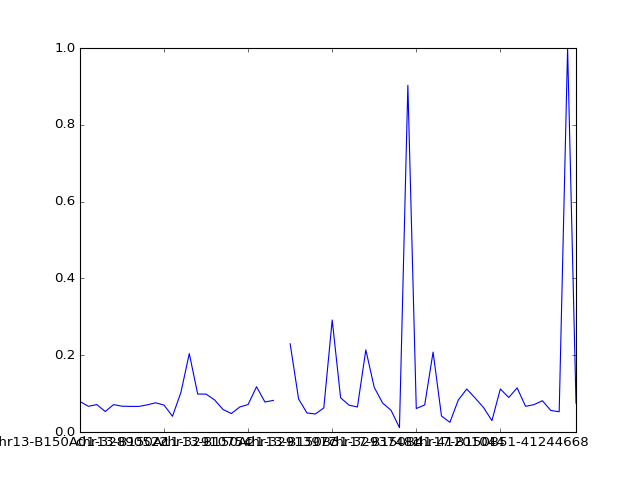

In [56]:
data_a_nb['021-D03_S16'].plot()

In [57]:
data_0930 = pd.DataFrame.from_csv(r'/Users/codeunsolved/TopgenData1/TopgenNGS/TopgenData/BRCA160930/reads_statistics-reads', header=0, sep='\t')
data_0930

,NGS160922-10,NGS160922-7,NGS160922-8,NGS160922-9,NGS160926-10,NGS160926-11,NGS160926-12,NGS160926-13,NGS160926-1,NGS160926-6,NGS160926-7,NGS160926-8,NGS160926-9,NGS160927-4,NGS160928-5,NGS160928-6,NGS160928-7,NGS160928-8,NGS160928-9
chr13-B150A01-32890522-32890740,1986,4262,4830,3818,5374,4570,4277,4992,3806,3179,3916,3866,5897,1188,1544,1360,1216,1006,1336
chr13-B150A02-32893271-32893493,2481,4910,6091,4697,5487,5129,5107,5530,3828,3543,3517,3631,6893,1192,1742,1175,1205,1143,945
chr13-B150A03-32899235-32899405,1660,3536,4261,3566,4325,3861,3085,3966,2715,2922,2734,3376,5002,939,1028,756,782,567,720
chr13-B150A04-32900295-32900481,2033,4405,5456,4308,5073,4700,4888,5497,3559,3570,3324,3224,6276,1058,1221,963,899,712,835
chr13-B150A05-32903521-32903739,1432,2872,3880,2651,3287,2886,3081,3186,2140,2198,2173,2541,4372,1024,1395,1076,1075,1016,962
chr13-B150A06-32906268-32906438,2243,4768,5771,4199,5338,4863,3820,5210,4287,3418,3501,4243,6322,1095,1163,969,750,593,717
chr13-B150A07-32906649-32906849,1347,2898,3178,2669,3393,2927,2601,3500,2681,2065,2694,2598,3253,774,846,741,527,511,550
chr13-B150A08-32907025-32907245,2488,5796,6477,4914,7246,6433,6280,7933,5393,4477,5006,5280,8499,1975,2352,2399,2276,1681,2046
chr13-B150A09-32907454-32907633,2400,4628,5635,4119,5518,4751,5061,5821,3728,3558,3860,3620,7062,1092,1435,989,909,838,915
chr13-B150A10-32910431-32910635,1077,2123,2554,2157,2683,2290,2363,2558,1813,1669,1909,1869,3208,675,853,659,604,512,546
